# Implementação P2 de ModSim

## Equações e fórmulas








In [78]:

#densidade do ar 1 atm 25C kg·m−3
den_ar=1.1839
##volume de ar interno m3
v_ar= 4
#massa de ar interno
m_ar=den_ar*v_ar
## calor especifico do ar

#calor específico à pressão constante do ar, cp = 1,0048 kJ/kgoC ##
#calor específico a volume constante do ar, cv = 0,717 kJ/kgoC

c_ar=1.0048*1000
#temperatura ambiente externa
T_ext=30+273.15
#espessura da lataria
d = 0.05
#área de contato da lataria com o ar interno
#de modo que devemos considerar, nessa porção, tanto a área interna quanto a externa. Estamos desprezando a área devida
#à espessura
a_frontal = 1.3*1.3
a_laterais = (3.3*1.3)*2
a_traseira = 1.5*0.5
a_piso = 3.3*1.5
a_teto = 3.3*1.5
a_tot = (a_frontal + a_laterais + a_traseira + a_piso + a_teto)
#condutividade térmica do aço --> 80W/mk
k=80
#coeficiente de transferência convectiva do ar --> 10W/m2k
h = 10
#potência termica do ar condicionado
Q_ac = 1700
#eficiencia do ar condicionado 80%
ef_ac = 0.7

#Q_ar_Ext = convecçao + conduçao
#conveção = = ℎ ⋅ 𝐴 ⋅ Δ𝑇
#condução = = (𝑘 ⋅ 𝐴 ⋅ Δ𝑇) / 𝑑








def EqDif(LisSol,t):
    T_int = LisSol[0]
    dTdt = (1/(m_ar*c_ar)) * (((T_ext-T_int) / ((1/(h * a_tot)) + (d/(k * a_tot))))-Q_ac)
    return dTdt










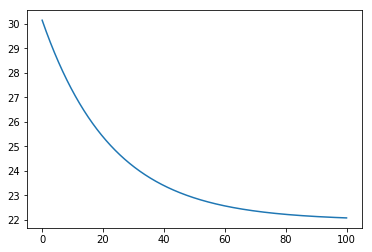

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
CI = [30+273.15]
delta_t = 0.001
ListaT = np.arange(0,100,delta_t)
solucao = odeint(EqDif,CI,ListaT)
ListaC = []
for C in solucao[:,0]:
    ListaC.append(C-273)
plt.plot(ListaT,ListaC)
plt.show()



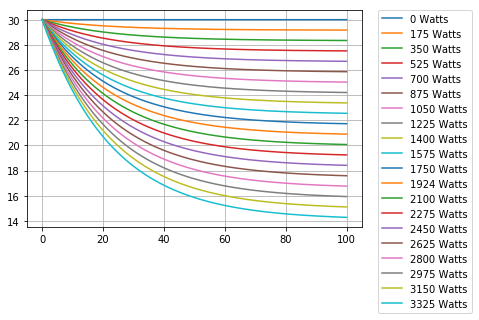

In [95]:
Lista_Pot = np.arange(0,5000,250)
def EqDif_Pot(LisSol,t,Pot):
    T_int = LisSol[0]
    dTdt = (1/(m_ar*c_ar)) * (((T_ext-T_int) / ((1/(h * a_tot)) + (d/(k * a_tot))))-Pot)
    return dTdt

for i in Lista_Pot:
    solucao = odeint(EqDif_Pot,CI,ListaT, args=((i*ef_ac),))
    ListaC =[]
    for k in solucao[:,0]:
        ListaC.append(k - 273.15)
        potencia_ac = int(i*ef_ac)
    plt.plot(ListaT,ListaC,label = "{} Watts".format(potencia_ac))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()
    

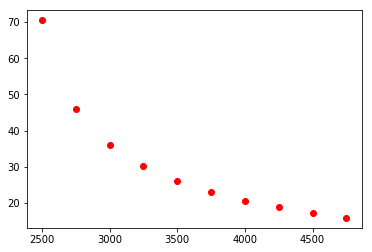

In [98]:
for i in Lista_Pot:
    solucao = odeint(EqDif_Pot,CI,ListaT, args=((i*ef_ac),))
    LisTr = []
    LisPOT = []
    for v,t in enumerate(solucao[:,0]):
        if t <+ 295.15:
            LisPOT.append(i)
            LisTr.append(t)
            plt.plot(LisPOT,ListaT[v],"ro")
            break

